In [1]:
#pip install powerbiclient

In [2]:
import pandas as pd

In [3]:
from powerbiclient import Report, models

In [4]:
from powerbiclient.authentication import DeviceCodeLoginAuthentication


In [5]:
device_auth = DeviceCodeLoginAuthentication()

Performing interactive authentication. Please follow the instructions on the terminal.
 To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code EVTAVHN3X to authenticate.
You have logged in.
Interactive authentication successfully completed.


In [6]:
group_id="50078b25-4689-445c-a32a-c071154e60f6"
report_id="40f73cc5-71d3-40ac-8e85-d36b60355655"
report = Report(group_id=group_id, report_id=report_id, auth=device_auth)

In [7]:
def loaded_callback(event_details):
    print('Informe cargado con éxito')
def error_callback(event_details):
    print('error',event_details)
    
report.on('loaded',loaded_callback)
report.on('error',error_callback)       

In [8]:
report

Report()

Informe cargado con éxito


In [15]:
pages=report.get_pages();

In [16]:
pages

[{'name': 'ReportSection093f5fcb720467e3cc8b',
  'displayName': 'Crecimiento',
  'isActive': False,
  'visibility': 0,
  'defaultSize': {'type': 0, 'width': 1280, 'height': 720},
  'defaultDisplayOption': 2},
 {'name': 'ReportSection',
  'displayName': 'Tendencia',
  'isActive': False,
  'visibility': 0,
  'defaultSize': {'type': 0, 'width': 1280, 'height': 720},
  'defaultDisplayOption': 2},
 {'name': 'ReportSectionb218f203724a770dc706',
  'displayName': 'Forecast',
  'isActive': False,
  'visibility': 0,
  'defaultSize': {'type': 0, 'width': 1280, 'height': 720},
  'defaultDisplayOption': 2},
 {'name': 'ReportSectioncfe7f3bb911b441025ee',
  'displayName': 'ETS(AAN)',
  'isActive': False,
  'visibility': 0,
  'defaultSize': {'type': 0, 'width': 1280, 'height': 720},
  'defaultDisplayOption': 2},
 {'name': 'ReportSectiona1fde2d5d0547b27883d',
  'displayName': 'ETS(AAA)',
  'isActive': False,
  'visibility': 0,
  'defaultSize': {'type': 0, 'width': 1280, 'height': 720},
  'defaultDispla

In [11]:
# Get the list of visuals on a page
#visuals = report.visuals_on_page(page_name)

In [12]:
#visuals

In [17]:
active_page_name=report.get_pages()[12]['name']
visuals=report.visuals_on_page(active_page_name)
visual=next(filter(lambda visual: visual['type'] == 'tableEx', visuals))
visual_name=visual['name']

Obtener una tabla desde visualizacion activa con Pandas

In [18]:
# Get 10 rows of provided visual's summarized data
from io import StringIO
summarized_exported_data = report.export_visual_data(active_page_name, visual_name, rows=50)
data=StringIO(summarized_exported_data)

df=pd.read_csv(data, sep=",")
df.head(10)


,Código Producto,Descripción,Ventas Productos,Venta Acumulada Productos,% Acumulado,Clasificación ABC
0,BE-PLS2050,SET BIOLINE-COATING,3467385011,3467385011,"7,32 %",A
1,100,PACKAGED DRIVELINE,1079849984,4547234995,"9,60 %",A
2,GLO-MAQUET,30% REALIZADA CAPACITACION Y MARCHA BLANCA,826927580,5374162575,"11,34 %",A
3,610132,ANGIO SEAL 6FR.,791083800,6165246375,"13,01 %",A
4,VKMO71000,OXIGENADOR QUADROX-I ADULTO C/FILT.ART.,775684051,6940930426,"14,65 %",A
5,GLO-MAQUET-2,01 BOMBA CENTRIFUGA; 01 BLENDER; 01 INTERCAMBI...,744616096,7685546522,"16,22 %",A
6,6885049,KIT CATETER PICCO PARA MEDICION DE GASTO CARDI...,718215312,8403761834,"17,73 %",A
7,VH-2400,VASOVIEW 6,609743239,9013505073,"19,02 %",A
8,BE-HLS7050,SET HLS ADVANCED 7.0,600415096,9613920169,"20,29 %",A
9,BE-HMOD30000,OXIGENADOR ECMO PEDIATRICO,589738217,10203658386,"21,53 %",A


<AxesSubplot:ylabel='Descripción'>

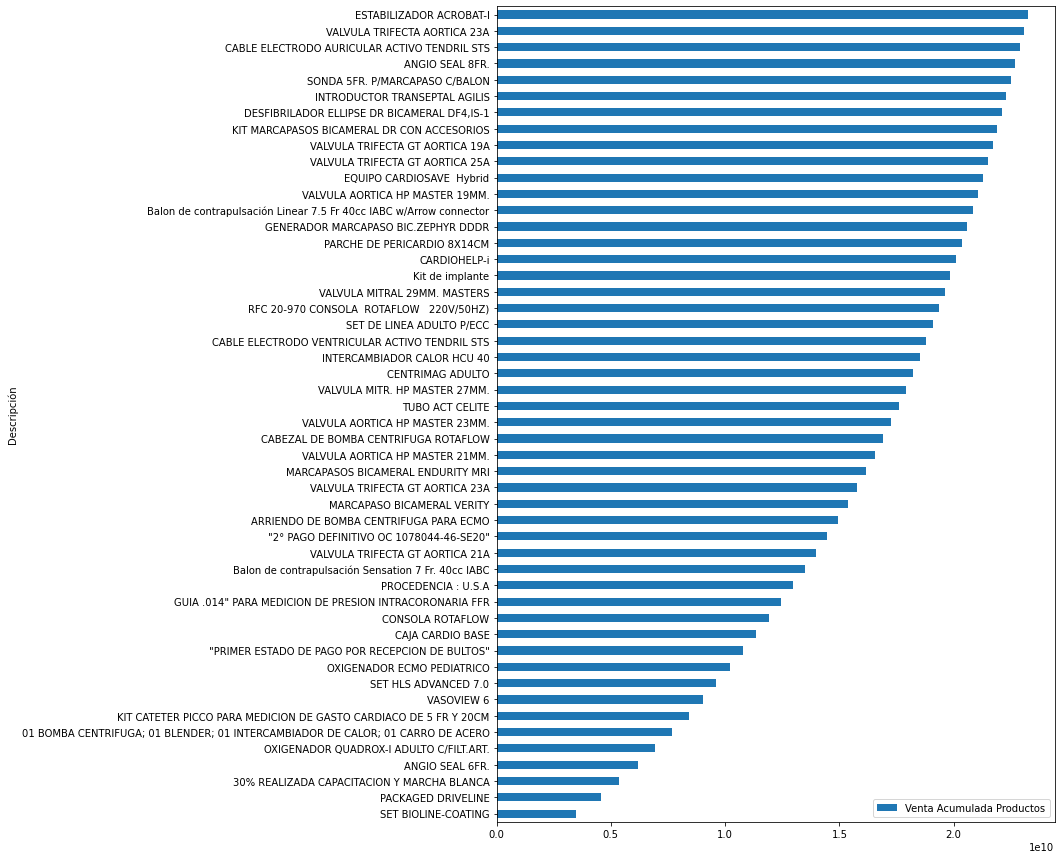

In [19]:
df.plot.barh(y="Venta Acumulada Productos",x="Descripción",figsize=(10,15))